In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_frame = pd.read_csv('planet_OGLE_Test.dat')

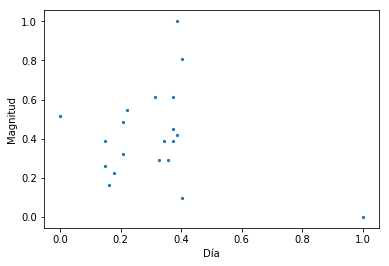

In [3]:
N = 20
df = data_frame.sample(N)
x = np.array(df['Days'])
y = np.array(df['Mag'])
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
plt.scatter(x, y, s=5)
plt.xlabel('Día')
plt.ylabel('Magnitud')
plt.show()

In [4]:
d = 1
alpha = 100
sigma = np.var(x)

### Lineal

In [5]:
x_r_l = x.reshape(N, 1)
phi_l = np.hstack((np.ones([N, 1]), x_r_l))
y_l = y.reshape(N, 1)

In [6]:
I_l = np.identity(d)
V_n_l = np.linalg.inv(((1/(alpha**2)) * I_l) + (1/(sigma**2)) * np.transpose(phi_l).dot(phi_l))

In [7]:
m_l = ((1 / (sigma ** 2)) * V_n_l).dot(np.transpose(phi_l)).dot(y_l)

In [8]:
N_2 = 20
days_to_pred_l = np.linspace(np.min(x), np.max(x), N_2)
d_r_l = days_to_pred_l.reshape(N_2, 1)
phi_pred_l = np.hstack((np.ones([N_2, 1]), d_r_l))
# dim_phi_pred_l = 20 * (d + 1)

In [11]:
M_l = phi_pred_l.dot(m_l)
I_2_l = np.identity(N_2)
Sigma_l = (sigma ** 2) * I_2_l + phi_pred_l.dot(V_n_l).dot(np.transpose(phi_pred_l))
# dim_sigma = 20 * 20

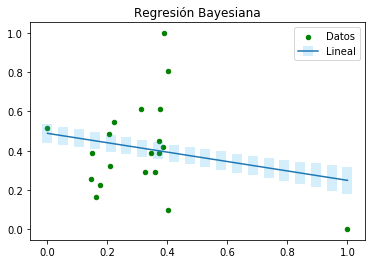

In [12]:
err_l = np.diagonal(Sigma_l) * 30
plt.errorbar(days_to_pred_l, M_l, yerr=err_l, ecolor=(0.16, 0.67, 0.94, 0.2), elinewidth=10)
plt.scatter(x, y, s=20, color='g')
plt.title('Regresión Bayesiana')
plt.legend(['Datos', 'Lineal'])
plt.show()

### Polinomial

In [13]:
def exp(v, n):
    if n == 1:
        return v
    return v * exp(v, n - 1) 

In [14]:
x_r = x.reshape(N, 1)
phi = np.hstack((np.ones([N, 1]), x_r, exp(x_r, 2), exp(x_r, 3), exp(x_r, 4)))
y = y.reshape(N, 1)

In [15]:
I = np.identity(d + 4)
V_n = np.linalg.inv(((1/(alpha**2)) * I) + (1/(sigma**2)) * np.transpose(phi).dot(phi))

In [16]:
m = ((1 / (sigma ** 2)) * V_n).dot(np.transpose(phi)).dot(y)

In [17]:
N_2 = 20
days_to_pred = np.linspace(np.min(x), np.max(x), N_2)
d_r = days_to_pred.reshape(N_2, 1)
phi_pred = np.hstack((np.ones([N_2, 1]), d_r, exp(d_r, 2), exp(d_r, 3), exp(d_r, 4)))
# dim_phi_pred = 20 * (d + 1)

In [18]:
M = phi_pred.dot(m)
I_2 = np.identity(N_2)
Sigma = (sigma ** 2) * I_2 + phi_pred.dot(V_n).dot(np.transpose(phi_pred))
# dim_sigma = 20 * 20

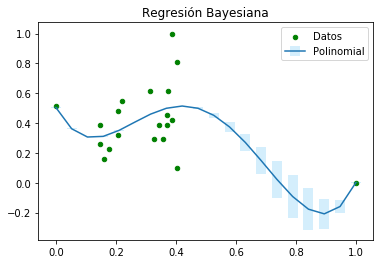

In [19]:
err = np.diagonal(Sigma)
plt.errorbar(days_to_pred, M, yerr=err, ecolor=(0.16, 0.67, 0.94, 0.2), elinewidth=10)
plt.scatter(x, y, s=20, color='g')
plt.title('Regresión Bayesiana')
plt.legend(['Datos', 'Polinomial'])
plt.show()

### Ambos

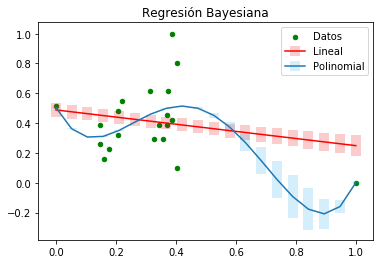

In [20]:
plt.errorbar(days_to_pred_l, M_l, yerr=err_l, color='red', ecolor=(0.9, 0.01, 0.01, 0.2), elinewidth=10)
plt.errorbar(days_to_pred, M, yerr=err, ecolor=(0.16, 0.67, 0.94, 0.2), elinewidth=10)
plt.scatter(x, y, s=20, color='g')
plt.title('Regresión Bayesiana')
plt.legend(['Datos', 'Lineal', 'Polinomial'])
plt.show()